In [243]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

In [244]:
hoc_mean = 16000 #taken from Table 2
total_mass_loss = 1233 #taken from Table 2

df = pd.read_csv("Full-Scale Fire Test_Mass data.csv",index_col=0)
df.head()

,Time,Mass
0,0.0,8324.585868
1,10.0,8324.585868
2,20.0,8324.585868
3,30.0,8324.585868
4,40.0,8324.585868


In [245]:
df["Mass Loss"] = df.loc[0,"Mass"] - df["Mass"] 
df["MLR"] = -1 * np.diff(df["Mass"],prepend=df.loc[0,"Mass"])/10
df["HRR"] = df["MLR"] * hoc_mean
df["MLR (smoothed)"] = scipy.ndimage.uniform_filter1d(df["MLR"],size=25)
df["Mass Loss (smoothed)"] = df["MLR (smoothed)"].cumsum()*10
df["HRR (smoothed)"] = df["MLR (smoothed)"] * hoc_mean
df = df[['Time', 'Mass', 'Mass Loss', 'MLR', 'HRR', 'Mass Loss (smoothed)', 'MLR (smoothed)', 'HRR (smoothed)']]
df.head()

,Time,Mass,Mass Loss,MLR,HRR,Mass Loss (smoothed),MLR (smoothed),HRR (smoothed)
0,0.0,8324.585868,0.0,-0.0,-0.0,0.0,0.0,0.0
1,10.0,8324.585868,0.0,-0.0,-0.0,0.0,0.0,0.0
2,20.0,8324.585868,0.0,-0.0,-0.0,0.0,0.0,0.0
3,30.0,8324.585868,0.0,-0.0,-0.0,0.0,0.0,0.0
4,40.0,8324.585868,0.0,-0.0,-0.0,0.0,0.0,0.0


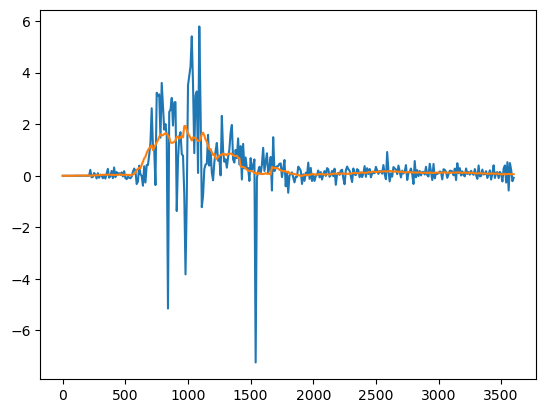

In [246]:
plt.plot(df["Time"],df["MLR"])
plt.plot(df["Time"],df["MLR (smoothed)"])

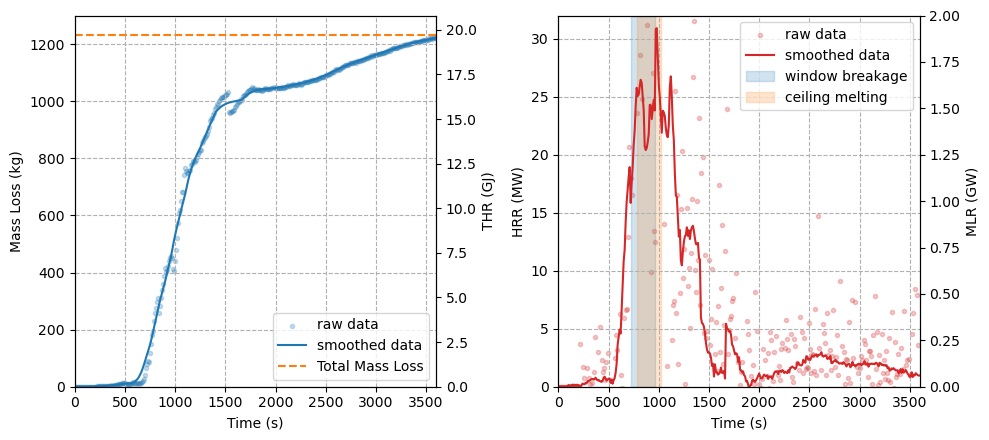

In [247]:
fig, ax1 = plt.subplots(1,2, figsize=(10,4.5))

color = 'tab:blue'

ax1[0].set_xlabel('Time (s)')
ax1[0].set_ylabel('Mass Loss (kg)')
ax1[0].scatter(df["Time"],df["Mass Loss"],marker=".",alpha=0.25,label="raw data", color=color)
ax1[0].plot(df["Time"],df["Mass Loss (smoothed)"],label="smoothed data", color=color)
ax1[0].axhline(1233,color="C1",label="Total Mass Loss",linestyle="--")
ax1[0].set_xlim(0,3600)
ax1[0].set_ylim(0,1300)
ax1[0].grid(linestyle="--")

ax2 = ax1[0].twinx()

ax2.set_ylabel('THR (GJ)')
ax2.set_ylim(0,1300*hoc_mean/1000/1000)

color = 'tab:red'
ax1[1].set_xlabel('Time (s)')
ax1[1].set_ylabel('HRR (MW)')
ax1[1].scatter(df["Time"],df["HRR"]/1000,marker=".",alpha=0.25,label="raw data", color=color)
ax1[1].plot(df["Time"],df["HRR (smoothed)"]/1000,label="smoothed data", color=color)
ax1[1].axvspan(12*60,16*60,alpha=0.2,label="window breakage",color="C0")
ax1[1].axvspan(13*60,17*60,alpha=0.2,label="ceiling melting",color="C1")
ax1[1].set_xlim(0,3600)
ax1[1].set_ylim(0,32)
ax1[1].grid(linestyle="--")

ax2 = ax1[1].twinx()  # instantiate a second Axes that shares the same x-axis

ax2.set_ylabel('MLR (GW)')  # we already handled the x-label with ax1
ax2.set_ylim(0,32000/hoc_mean)

ax1[0].legend()
ax1[1].legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

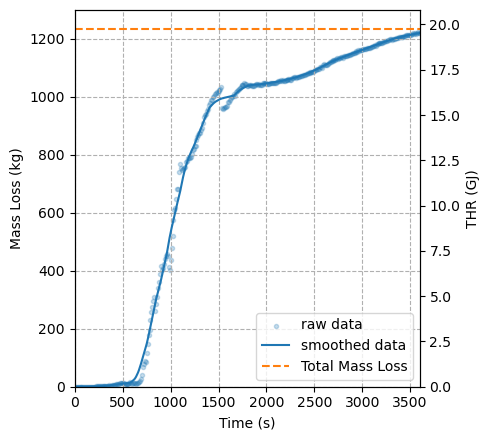

In [248]:
fig, ax1 = plt.subplots(figsize=(5,4.5))

color = 'tab:blue'

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Mass Loss (kg)')
ax1.scatter(df["Time"],df["Mass Loss"],marker=".",alpha=0.25,label="raw data", color=color)
ax1.plot(df["Time"],df["Mass Loss (smoothed)"],label="smoothed data", color=color)
ax1.axhline(1233,color="C1",label="Total Mass Loss",linestyle="--")
ax1.set_xlim(0,3600)
ax1.set_ylim(0,1300)
ax1.grid(linestyle="--")

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

ax2.set_ylabel('THR (GJ)')  # we already handled the x-label with ax1
ax2.set_ylim(0,1300*hoc_mean/1000/1000)

ax1.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.savefig("MassLoss_THR.png",dpi=300)
plt.show()

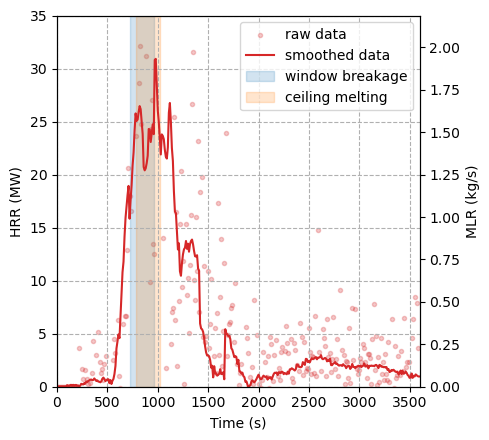

In [249]:
fig, ax1 = plt.subplots(figsize=(5,4.5))

color = 'tab:red'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('HRR (MW)')
ax1.scatter(df["Time"],df["HRR"]/1000,marker=".",alpha=0.25,label="raw data", color=color)
ax1.plot(df["Time"],df["HRR (smoothed)"]/1000,label="smoothed data", color=color)
ax1.axvspan(12*60,16*60,alpha=0.2,label="window breakage",color="C0")
ax1.axvspan(13*60,17*60,alpha=0.2,label="ceiling melting",color="C1")
ax1.set_xlim(0,3600)
ax1.set_ylim(0,35)
ax1.grid(linestyle="--")

ax2 = ax1.twinx()

ax2.set_ylabel('MLR (kg/s)')
ax2.set_ylim(0,35000/hoc_mean)

ax1.legend()

fig.tight_layout()

plt.savefig("HRR_MLR.png",dpi=300)
plt.show()